In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from pyecharts.charts import Pie
from pyecharts import options as opts
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',None)

In [4]:
df=pd.read_csv('lagou.csv')

# 分析目标
# 1.各城市对数据分析岗位的需求情况
# 2.不同细分领域对数据分析岗的需求情况
# 3.数据分析岗位的薪资状况
# 4.工作经验与薪水的关系
# 5.公司都要求什么掌握什么技能
# 6.岗位的学历要求高吗
# 7.不同规模的企业对工资经验的要求以及提供的薪资水平

In [15]:
df.columns

Index(['positionName', 'companyShortName', 'city', 'companySize', 'education',
       'financeStage', 'industryField', 'salary', 'workYear', 'hitags',
       'companyLabelList', 'job_detail'],
      dtype='object')

In [16]:
#去除我們進行後續分析所需的字段
columns=['positionName','companyShortName','city','companySize','education','financeStage',
         'industryField','salary','workYear','hitags','companyLabelList','job_detail']
#去重
df=df[columns].drop_duplicates()

In [17]:
#原始数据长度
len(df)

2939

In [23]:
# 职位名中含有数据分析字眼的
cond_1=df['positionName'].str.contains("数据分析")
# 剔除掉带实习字眼的
cond_2=~df['positionName'].str.contains("实习")
# 数据分析相应的岗位数量
len(df[cond_1&cond_2]['positionName'])

1326

In [25]:
# 筛选出我们想要的字段，并剔除positionName
df=df[cond_1 & cond_2]
#axis=1(列),inplace 指定 DataFrame 進行就地修改 True
df.drop(['positionName'],axis=1,inplace=True)  
#drop为False则索引列会被还原为普通列，否则会丢失
df.reset_index(drop=True,inplace=True)

In [26]:
#将拉勾网的薪水转化为数值
# 处理过程
#1、将salary中的字符串均小写化（因为存在8k-16k和8K-16K）
#2、运用正则表达式提取出薪资区间
#3、将提取出来的数字转化为int型
#4、取区间的平均值
df['salary']=df['salary'].str.lower()\
                .str.extract(r'(\d+)[k]-(\d+)k')\
                .applymap(lambda x:int(x))\
                .mean(axis=1)

In [28]:
# 将技能分为以下几类：
# Python/R
# SQL
# Tableau
# Excel
#如果job_detail中含有上述四类，则赋值为1，不含有则为0


#将字符串小写化，并将缺失值赋值为空字符串
#str.lower()字符串中所有大写字符为小写
#map() 函数语法 map(function(函数), iterable(一个或多个序列), ...)
df['job_detail']=df['job_detail'].str.lower().fillna("")

df['Python/R']=df['job_detail'].map(lambda x:1 if('python' in x) or ('r' in x )else 0)
df['SQL']=df['job_detail'].map(lambda x:1 if ('sql' in x) or ('hive' in x) else 0)
df['Tableau']=df['job_detail'].map(lambda x:1 if 'tableau' in x else 0)
df['Excel']=df['job_detail'].map(lambda x:1 if 'excel' in x else 0)

In [29]:
df.head(1)

,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,hitags,companyLabelList,job_detail,Python/R,SQL,Tableau,Excel
0,达达-京东到家,北京,2000人以上,本科,D轮及以上,消费生活,22.5,3-5年,"['免费班车', '新婚红包', '定期调薪', '电脑补贴', '生子红包', '地铁周边...","['年底双薪', '绩效奖金', '岗位晋升', '定期体检']","1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",1,1,0,1


In [30]:
#处理行业信息
def clean_industry(industry):
    industry = industry.split(',')
    if industry[0] == '移动互联网' and len(industry)>1:
        return industry[1]
    else:
        return industry[0]
df['industryField']=df.industryField.map(clean_industry)

Text(0, 0.5, '')

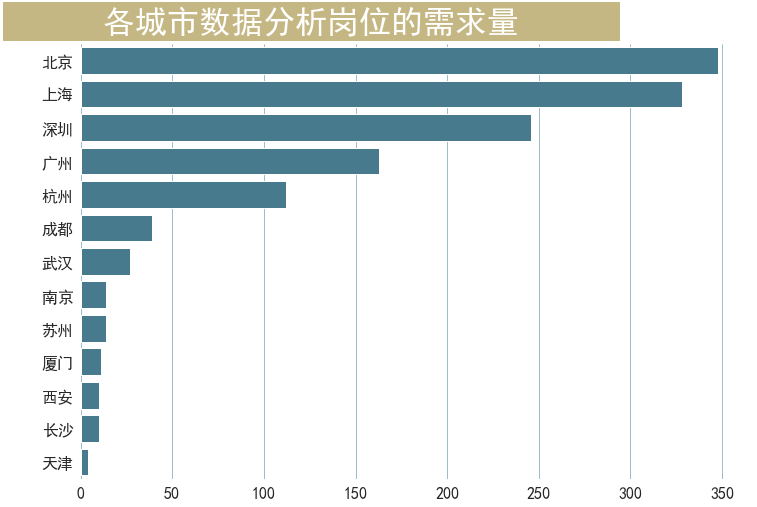

In [34]:
#各城市对数据分析岗位的需求量
fig,ax=plt.subplots(figsize=(12,8))
sns.countplot(y='city',order=df['city'].value_counts().index,data=df,color='#3c7f99')
plt.box(False)
fig.text(x=0.04,y=0.90,s='      各城市数据分析岗位的需求量      ',
         fontsize=32,weight='bold',color='white',backgroundcolor='#c5b783')
plt.tick_params(axis='both',which='major',labelsize=16)
ax.xaxis.grid(which='both',linewidth=0.5,color='#3c7f99')
plt.xlabel('')
plt.ylabel('')

#对数据分析师岗位需求量较大的是四个一线城市，其中北京和上海分别位列前两位。除了北上广深和杭州外，其他热门城市的需求并不大，
#所以，如果你想找数据分析相关的工作，最好还是去一线城市寻找相应的机会

In [35]:
#不同细分领域对数据分析岗的需求量
industry_index=df['industryField'].value_counts()[:10].index
industry=df.loc[df['industryField'].isin(industry_index),'industryField']

Text(0, 0.5, '')

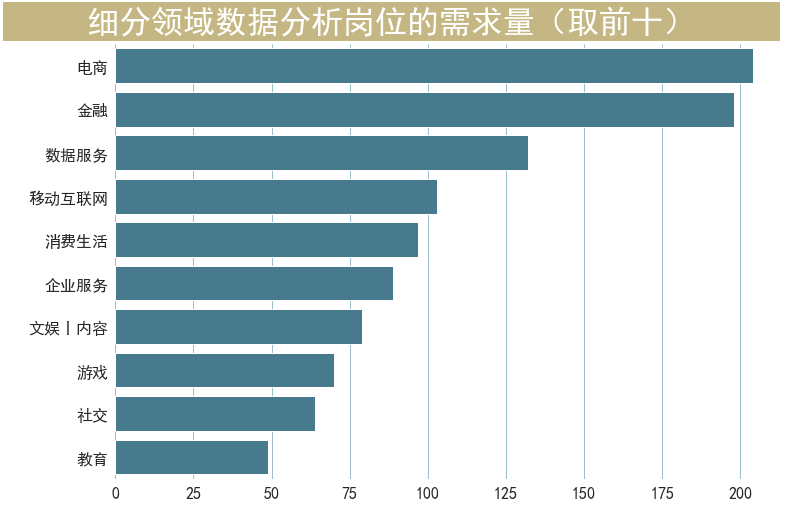

In [36]:
fig,ax=plt.subplots(figsize=(12,8))
sns.countplot(y=industry.values,order=industry_index,color='#3c7f99')
plt.box(False)
fig.text(x=0,y=0.90,s='     细分领域数据分析岗位的需求量（取前十）     ',
        fontsize=32,weight='bold',color='white',backgroundcolor='#c5b783')
plt.tick_params(axis='both',which='major',labelsize=16)
ax.xaxis.grid(which='both',linewidth=0.5,color='#3c7f99')
plt.xlabel('')
plt.ylabel('')

#电商、金融和数据服务这三个领域的需求量位列前三位，电商和金融领域的需求远远超过其他领域

Text(0, 0.5, '')

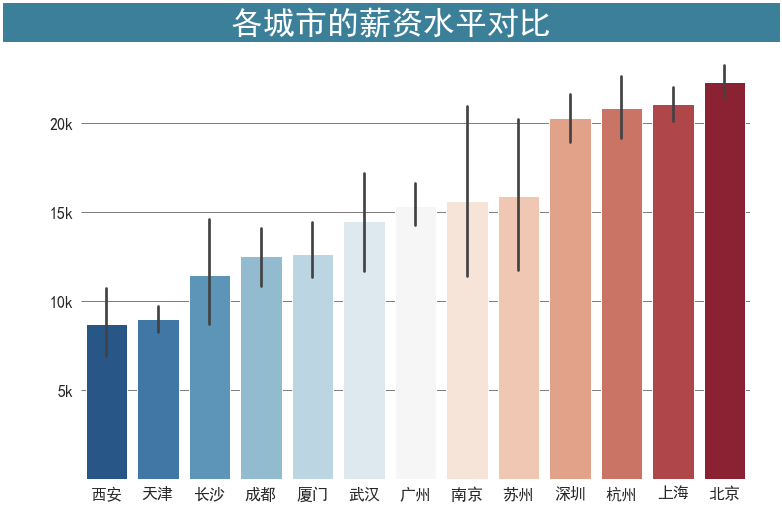

In [38]:
#各城市相应岗位的薪资状况
fig,ax=plt.subplots(figsize=(12,8))
city_order=df.groupby('city')['salary'].mean().sort_values().index.tolist()
sns.barplot(x='city',y='salary',order=city_order,data=df,ci=95,palette='RdBu_r')
fig.text(x=0.04,y=0.90,s='              各城市的薪资水平对比              ',
         fontsize=32,weight='bold',color='white',backgroundcolor='#3c7f99')
plt.tick_params(axis='both',labelsize=16,)
ax.yaxis.grid(which='both',linewidth=0.5,color='black')
ax.set_yticklabels(['','5k','10k','15k','20k'])
plt.box(False)
plt.xlabel('')
plt.ylabel('')


#图中柱状图上的黑条（暂且取这么个名字）统计学上叫做置信区间，代表着95%的职位所对应的薪水在黑条的区间范围内
#上海、杭州、深圳处于第一梯队，月均薪水都超过了20k
#其中令我比较好奇的是广州的平均薪水，作为四大一线城市之一，虽然生活成本比其他一线城市略低
#其中令我比较好奇的是广州的平均薪水，作为四大一线城市之一，虽然生活成本比其他一线城市略低，但均薪却被其他三个兄弟甩了一截

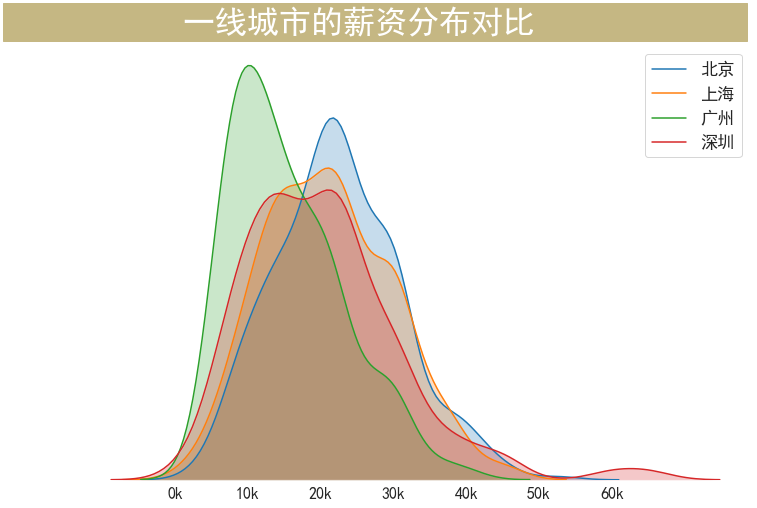

In [40]:
#一线城市的薪资分布对比
fig,ax=plt.subplots(figsize=(12,8))
fig.text(x=0.04,y=0.90,s='           一线城市的薪资分布对比             ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#c5b783')
sns.kdeplot(df[df['city']=='北京']['salary'],shade=True,label='北京')
sns.kdeplot(df[df['city']=='上海']['salary'],shade=True,label='上海')
sns.kdeplot(df[df['city']=='广州']['salary'],shade=True,label='广州')
sns.kdeplot(df[df['city']=='深圳']['salary'],shade=True,label='深圳')
plt.tick_params(axis='both',which='major',labelsize=16)
plt.box(False)
plt.xticks(np.arange(0,61,10),[str(i)+'k' for i in range(0,61,10)])
plt.yticks([])
plt.legend(fontsize='xx-large',fancybox=None)

#大一线城市的薪资分布来看，深圳和上海的分布较为接近，
#广州大部分职位的薪水在10k左右，分布和其他三个城市差异较大

In [41]:
corr=df.pivot_table(index='city',columns='workYear',values='salary')

In [42]:
corr=corr[["应届毕业生","1-3年","3-5年","5-10年"]]
corr.loc[city_order]

workYear,应届毕业生,1-3年,3-5年,5-10年
city,,,,
西安,12.000000,6.250000,11.000000,NaN
天津,NaN,8.500000,9.000000,NaN
长沙,NaN,10.500000,11.000000,18.250000
成都,10.500000,9.500000,15.833333,18.333333
厦门,10.000000,11.375000,14.400000,NaN
武汉,9.000000,6.666667,17.300000,22.250000
广州,8.727273,10.915094,18.508621,24.800000
南京,12.500000,11.625000,21.000000,NaN
苏州,NaN,10.583333,20.750000,30.000000


Text(69.078125, 0.5, '')

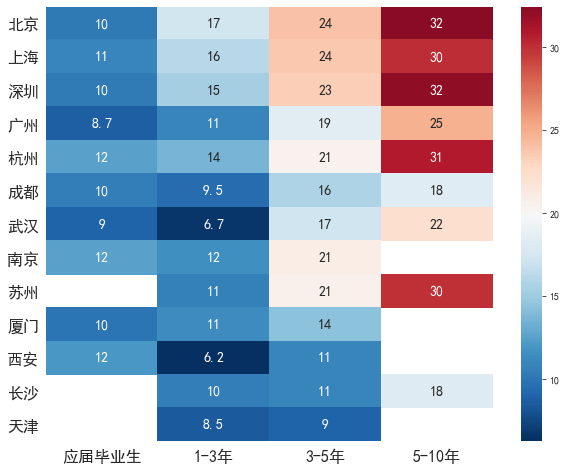

In [45]:
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(corr.loc[df['city'].value_counts().index],cmap='RdBu_r',center=20,annot=True,annot_kws={'fontsize':14})
plt.tick_params(axis='x',which='major',labelsize=16)
plt.tick_params(axis='y',which='major',labelsize=16,labelrotation=0)
plt.xlabel('')
plt.ylabel('')

#从横向对比来看，可以明显的看出，随着资历的增加，数据分析师的薪水也会相应提高。对有3-5年经验的数据分析师，若符合企业的招聘条件，在北上广深杭基本平均而言都能拿到20k及以上的薪水。
#纵向对比来看，广州在各个经 验段上的薪资均不及其他三个一线城市，而且差距还不小。所以，广州给的钱确实少

In [46]:
#技能要求
py_rate=df['Python/R'].value_counts(normalize=True).loc[1]
sql_rate=df['SQL'].value_counts(normalize=True).loc[1]
tableau_rate=df['Tableau'].value_counts(normalize=True).loc[1]
excel_rate=df['Excel'].value_counts(normalize=True).loc[1]
print("职位技能需求:")
print("Python/R：",py_rate)
print("SQL：",sql_rate)
print("Excel：",excel_rate)
print("Tableau：",tableau_rate)

#要求会Python/R的公司占到60.8%，和SQL的60.7%相接近。有33.1%的公司要求会Excel，要求会Tableau的公司仅占9.5%。
#这说明，Python/R和SQL已成为超六成公司的必备技能

职位技能需求:
Python/R： 0.6078431372549019
SQL： 0.6070889894419306
Excel： 0.3310708898944193
Tableau： 0.09502262443438914


In [50]:
def get_level(x):
    if x['Python/R']==1:
        x['skill'] = 'Python/R'
    elif x['SQL'] == 1:
        x['skill'] ='SQL'
    elif x['Excel'] ==1:
        x['skill'] = 'Excel'
    else:
        x['skill'] = '其他'
    return x

In [51]:
df=df.apply(get_level,axis=1)

Text(0, 0.5, '技能')

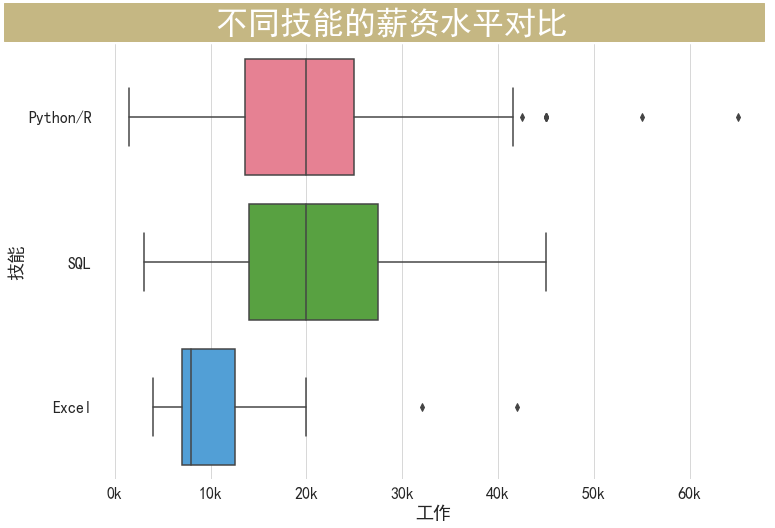

In [91]:
fig,ax=plt.subplots(figsize=(12,8))
fig.text(x=0.02,y=0.90,s='             不同技能的薪资水平对比            ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#c5b783')
sns.boxplot(y='skill',x='salary',data=df.loc[df.skill!='其他'],palette='husl',order=['Python/R','SQL','Excel'])
plt.tick_params(axis='both',labelsize=16)
ax.xaxis.grid(which='both',linewidth=0.75)
plt.xticks(np.arange(0,61,10),[str(i)+"k" for i in range(0,61,10)])
plt.box(False)
plt.xlabel('工作',fontsize=18)
plt.ylabel('技能',fontsize=18)

#要求会Python/R和要求会SQL所对应的薪资中位数均为20k，
#会Python/R并没有比会SQL在薪资上更有优势，但仅要求会Excel的岗位对应的薪资则明显低于前两者

In [69]:
#学历要求
education=df['education'].value_counts(normalize=True)

In [74]:
from pyecharts.commons.utils import JsCode
def new_label_opts():
    return opts.LabelOpts(formatter=JsCode("学历要求"))

pie=(Pie().add( "",
            [list(z) for z in zip(education.index,np.round(education.values,4))],
            center=["50%","50%"],
            radius=["50%","75%"],
    label_opts=new_label_opts()
    
).set_global_opts(
                title_opts=opts.TitleOpts(title=""),
                legend_opts=opts.LegendOpts(
                            is_show=False
                )

).set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{d}%")))


D:\Users\user\anaconda3\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [75]:
pie.render_notebook()

#数据分析这个岗位对学历的要求并不是很高，绝大部分岗位的要求都是本科即可

In [76]:
#不同规模的公司在招人要求上的差异
company_size_map={
    "2000人以上": 6,
    "500-2000人": 5,
    "150-500人": 4,
    "50-150人": 3,
    "15-50人": 2,
    "少于15人": 1
}
workYear_map={
    "5-10年": 5,
    "3-5年": 4,
    "1-3年": 3,
    "1年以下": 2,
    "应届毕业生": 1
}
df['company_size']=df['companySize'].map(company_size_map)
df['work_year']=df['workYear'].map(workYear_map)

In [77]:
df=df.sort_values(by='company_size',ascending=True)

In [78]:
df_plot=df.loc[~df.work_year.isna()]

In [80]:
color_map={
    5:"#ff0000",
    4:"#ffa500",
    3:"#c5b783",
    2:"#3c7f99",
    1:"#0000cd"
}
df_plot['color']=df_plot.work_year.map(color_map)
df_plot.reset_index(drop=True,inplace=True)

D:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
def seed_scale_plot():
    seeds=np.arange(5)+1
    y=np.zeros(len(seeds),dtype=int)
    s=seeds*100
    colors=['#ff0000', '#ffa500', '#c5b783', '#3c7f99', '#0000cd'][::-1]
    fig,ax=plt.subplots(figsize=(12,1))
    plt.scatter(seeds,y,s=s,c=colors,alpha=0.3)
    plt.scatter(seeds,y,c=colors)
    plt.box(False)
    plt.grid(False)
    plt.xticks(ticks=seeds,labels=list(workYear_map.keys())[::-1],fontsize=14)
    plt.yticks(np.arange(1),labels=['  经验：'],fontsize=16)

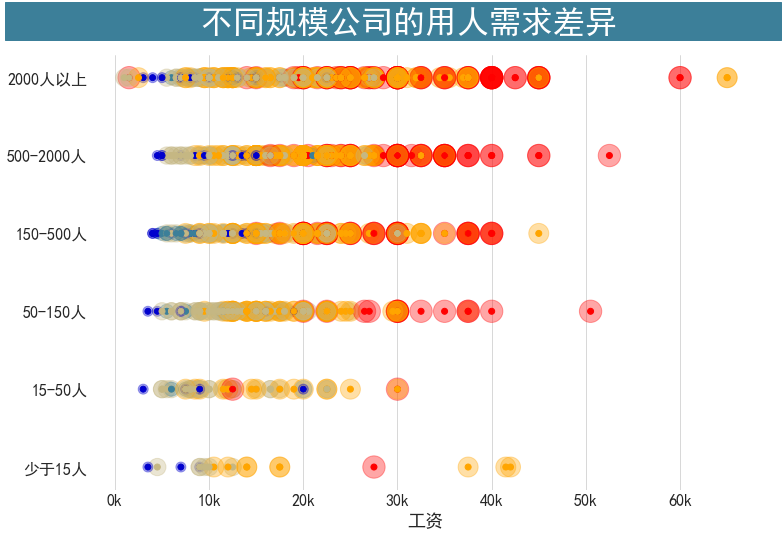

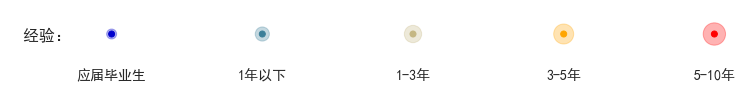

In [83]:
fig,ax=plt.subplots(figsize=(12,8))
fig.text(x=0.03,y=0.92,s='            不同规模公司的用人需求差异          ', fontsize=32, 
         weight='bold', color='white', backgroundcolor='#3c7f99')
plt.scatter(df_plot.salary,df_plot["companySize"],s=df_plot['work_year']*100,alpha=0.35,c=df_plot['color'])
plt.scatter(df_plot.salary,df_plot['companySize'],c=df_plot['color'].values.tolist())
plt.tick_params(axis='both',which='both',length=0)
plt.tick_params(axis='both',which='major',labelsize=16)
ax.xaxis.grid(which='both',linewidth=0.75)
plt.xticks(np.arange(0,61,10),[str(i)+"k" for i in range(0,61,10)])
plt.xlabel('工资',fontsize=18)
plt.box(False)
seed_scale_plot()

#对小公司（50人及以下）而言，大部分公司开出的薪资不会超过30k，规模更大的公司开的起更高的薪水，即便是对于一些工作经验不到1年的数据分析师，规模稍大的公司也能开出20k-30k的薪水，
#所以如果从面向工资编程的角度看，大公司具有较为明显的优势
#当薪水超过30k时，公司对数据分析师的经验要求大多都是3-5年以及5-10年，此时经验成为了较大的门槛

In [85]:
df_skill=df.loc[(df["companySize"]=='2000人以上')&(df.skill!="其他")]['skill'].value_counts(normalize=True)

In [86]:
df_skill

Python/R    0.760234
SQL         0.178363
Excel       0.061404
Name: skill, dtype: float64

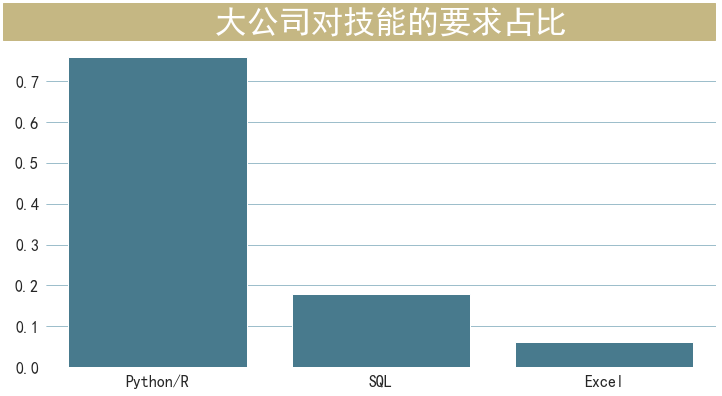

In [87]:
#大公司对技能的要求占比
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(x=df_skill.index,y=df_skill.values,color='#3c7f99')
plt.box(False)
fig.text(x=0.08,y=0.9,s='             大公司对技能的要求占比         ', 
         fontsize=32, weight='bold', color='white', backgroundcolor='#c5b783')
plt.tick_params(axis='both',which='major',labelsize=16)
ax.yaxis.grid(which='both',linewidth=0.5,color='#3c7f99')

#对大公司（2000人以上）中有具体技能要求的职位而言，约76%的职位要求掌握Python/R，仅要求会SQL的职位占比不到20%，
#所以，如果想进大公司的话，还是得把Python/R学好